# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [105]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [106]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,1/14/2019 10:14,13.83,5739410935873,5,Urban
1,South Michelleport,3/4/2019 18:24,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2/24/2019 4:29,33.44,2005065760003,57,Urban
3,Rodneyfort,2/10/2019 23:22,23.44,5149245426178,34,Urban
4,South Jack,3/6/2019 4:28,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [108]:
#  1. Get the total rides for each city type
total_rides = pyber_data_df.groupby(['type']).count()['ride_id']
total_rides

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [110]:
# 2. Get the total drivers for each city type
total_drivers = city_data_df.groupby(['type']).sum()['driver_count']
total_drivers

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [111]:
#  3. Get the total amount of fares for each city type
total_fares = pyber_data_df.groupby(['type']).sum()['fare']
total_fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [112]:
#  4. Get the average fare per ride for each city type. 
average_fare_ride = total_fares / total_rides
average_fare_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [113]:
# 5. Get the average fare per driver for each city type. 
average_fare_driver = total_fares / total_drivers
average_fare_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [132]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame({
    "Total Rides": total_rides,
    "Total Drivers": total_drivers,
    "Total Fares": total_fares,
    "Average Fare per Ride": average_fare_ride,
    "Average Fare per Driver": average_fare_driver
})
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [133]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [134]:
#  8. Format the columns.
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{: ,}".format)
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{: ,}".format)
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${: ,.2f}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${: .2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("${:.2f}".format)
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$ 4,327.93",$ 34.62,$55.49
Suburban,625,490,"$ 19,356.33",$ 30.97,$39.50
Urban,"1,625","2,405","$ 39,854.38",$ 24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [11]:
# 1. Read the merged DataFrame


In [135]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
pyber_dates = pyber_data_df.groupby(["date", "type"]).sum()["fare"]
pyber_dates.head()

date            type    
1/1/2019 0:08   Urban       37.91
1/1/2019 0:46   Suburban    47.74
1/1/2019 12:32  Suburban    25.56
1/1/2019 14:40  Urban        5.42
1/1/2019 14:42  Urban       12.31
Name: fare, dtype: float64

In [136]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
pyber_dates = pyber_dates.reset_index()
pyber_dates

,date,type,fare
0,1/1/2019 0:08,Urban,37.91
1,1/1/2019 0:46,Suburban,47.74
2,1/1/2019 12:32,Suburban,25.56
3,1/1/2019 14:40,Urban,5.42
4,1/1/2019 14:42,Urban,12.31
...,...,...,...
2359,5/8/2019 1:54,Urban,32.69
2360,5/8/2019 2:31,Urban,41.33
2361,5/8/2019 4:20,Urban,21.99
2362,5/8/2019 4:39,Urban,18.45


In [138]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
pyber_pivot = pyber_dates.pivot("date", "type", "fare")
pyber_pivot.index = pd.to_datetime(pyber_pivot.index)
pyber_pivot

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 12:32:00,NaN,25.56,NaN
2019-01-01 14:40:00,NaN,NaN,5.42
2019-01-01 14:42:00,NaN,NaN,12.31
...,...,...,...
2019-05-08 01:54:00,NaN,NaN,32.69
2019-05-08 02:31:00,NaN,NaN,41.33
2019-05-08 04:20:00,NaN,NaN,21.99


In [142]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
jan1_to_march28 = pyber_pivot.loc['2019-01-01':'2019-04-28']
jan1_to_march28

C:\Users\rjanke\Anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  


type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:00,NaN,NaN,37.91
2019-01-01 00:46:00,NaN,47.74,NaN
2019-01-01 12:32:00,NaN,25.56,NaN
2019-01-01 14:40:00,NaN,NaN,5.42
2019-01-01 14:42:00,NaN,NaN,12.31
...,...,...,...
2019-04-09 20:55:00,NaN,NaN,24.99
2019-04-09 21:41:00,NaN,NaN,15.96
2019-04-09 08:10:00,NaN,NaN,39.36


In [16]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)

In [143]:
# 7. Check that the datatype for the index is datetime using df.info()
jan1_to_march28.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2182 entries, 2019-01-01 00:08:00 to 2019-04-09 09:17:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  570 non-null    float64
 2   Urban     1501 non-null   float64
dtypes: float64(3)
memory usage: 68.2 KB


In [144]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
jan1_to_march28_resample = jan1_to_march28.resample('W').sum()
jan1_to_march28_resample

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


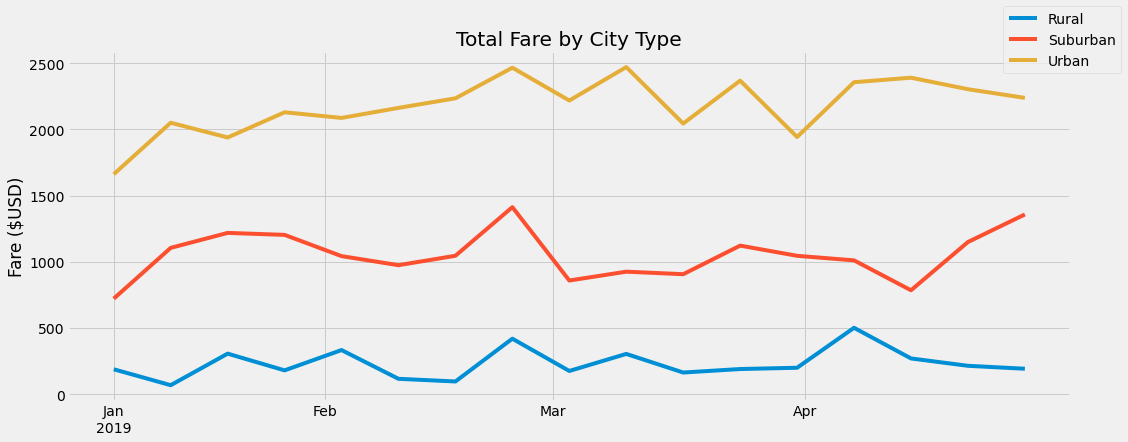

In [156]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
fig, ax1 = plt.subplots(figsize=(16, 6))
ax1.plot(jan1_to_march28_resample)
fig.legend(["Rural", "Suburban", "Urban"])
ax1.set_ylabel("Fare ($USD)")
ax1.set_xticks(['2019-01-06', '2019-02-01', '2019-03-01', '2019-04-01'])
ax1.set_xticklabels(['Jan\n2019','Feb','Mar','Apr'])
ax1.set_title("Total Fare by City Type")
plt.savefig("analysis/PyBer_fare_summary.png")
#ax1.set_xlabel("time")